# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/hkhai/OneDrive/Desktop/machine learning self/data sets/ibmwatson.csv")

In [3]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 24)

In [6]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
#Get the total number of customers who have responded
data.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

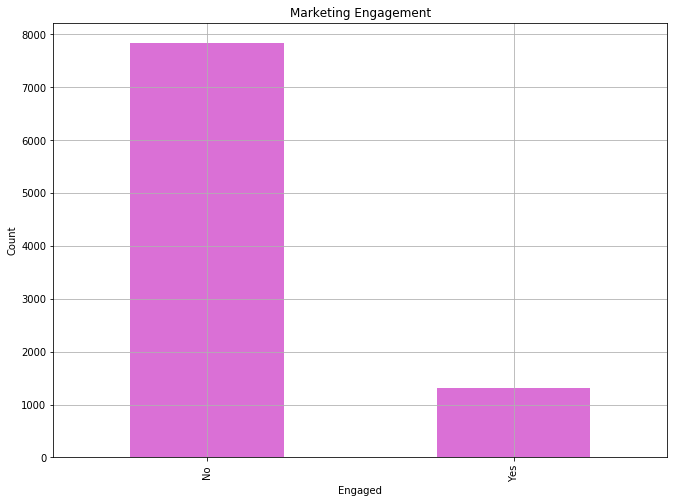

In [9]:
#visualize this in a bar plot
vis=data.groupby('Response').count()['Customer'].plot(kind='bar',
color='orchid',grid=True,figsize=(11,8),title='Marketing Engagement')
vis.set_xlabel('Engaged')
vis.set_ylabel('Count')
plt.show()

In [10]:
#calculate the precentage of the engaged and non-engaged customers
data.groupby('Response').count()['Customer']/data.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [11]:
data.shape[0]#show the total number of rows

9134

In [12]:
#Get the engagement rates per renewal offer type

offer_type=data.loc[data['Response']=='Yes',].groupby(['Renew Offer Type']).count()['Customer']/data.groupby('Renew Offer Type').count()['Customer']
offer_type

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

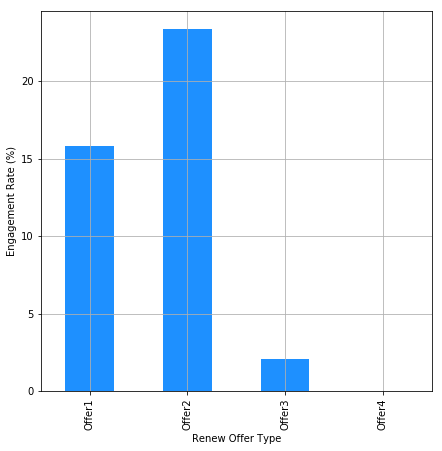

In [13]:
#Visualize it in a  bar plot
vis=(offer_type*100).plot(kind='bar',figsize=(7,7),color='dodgerblue',grid=True)
vis.set_ylabel('Engagement Rate (%)')
plt.show

In [16]:
offer_type=data.loc[data['Response']=='Yes'].groupby(['Renew Offer Type','Vehicle Class']).count()['Customer']/data.groupby('Renew Offer Type').count()['Customer']
offer_type

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [17]:
#make the previous output more readable using unstack function
# to pivot the data and extract and transform the inner-level group to colimns
offer_type=offer_type.unstack().fillna(0)
offer_type

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


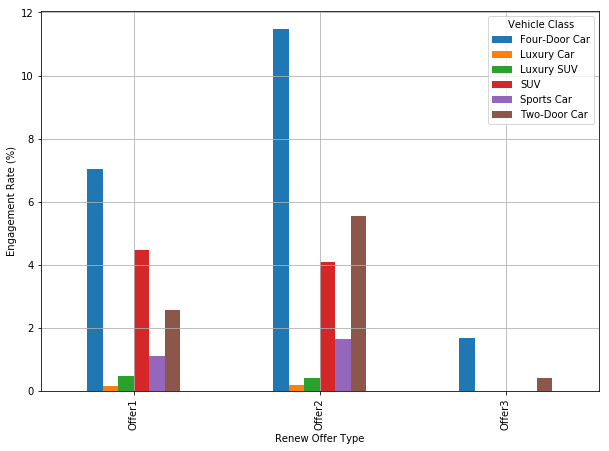

In [18]:
vis=(offer_type*100).plot(kind='bar',figsize=(10,7),grid=True)
vis.set_ylabel('Engagement Rate (%)')
plt.show()

In [8]:
#we are going to analyze how engagement rates differ by different sales channels
sales_channel=data.loc[data['Response']=='Yes'].groupby(['Sales Channel']).count()['Customer']/data.groupby('Sales Channel').count()['Customer']
sales_channel

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

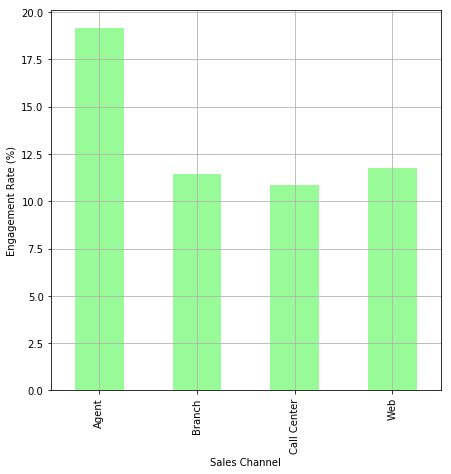

In [13]:
vis=(sales_channel*100).plot(kind='bar',figsize=(7,7),color='palegreen',grid=True)
vis.set_ylabel('Engagement Rate (%)')
plt.show()

In [15]:
sales_channel=data.loc[data['Response']=='Yes'].groupby(['Sales Channel','Vehicle Size']).count()['Customer']/data.groupby('Sales Channel').count()['Customer']
sales_channel

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [22]:
#Unstack the daTa into a more visible format
sales_channel=sales_channel.unstack().fillna(0)
sales_channel

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


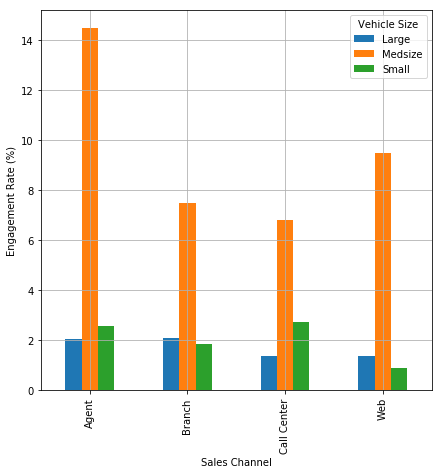

In [25]:
vis=(sales_channel*100).plot(kind='bar',figsize=(7,7),grid=True)
vis.set_ylabel('Engagement Rate (%)')
plt.show()

# Engagement Rates by Months Since Policy Inception

In [31]:
months_inception=data.loc[data['Response']=='Yes'].groupby(by='Months Since Policy Inception')['Response'].count()/data.groupby(by='Months Since Policy Inception')['Response'].count()*10
months_inception.fillna(0)

Months Since Policy Inception
0     1.445783
1     1.411765
2     2.022472
3     2.631579
4     1.978022
5     0.689655
6     0.000000
7     0.759494
8     0.740741
9     1.875000
10    1.578947
11    1.730769
12    0.600000
13    1.481481
14    0.000000
15    2.201835
16    0.000000
17    1.188119
18    1.333333
19    1.698113
20    1.165049
21    1.142857
22    1.290323
23    2.045455
24    2.195122
25    1.348315
26    1.500000
27    1.237113
28    1.747573
29    1.224490
        ...   
70    2.352941
71    1.200000
72    2.376238
73    0.681818
74    1.978022
75    0.612245
76    0.697674
77    1.894737
78    0.731707
79    1.188119
80    1.643836
81    1.578947
82    0.000000
83    2.400000
84    0.600000
85    1.411765
86    0.000000
87    0.789474
88    0.789474
89    1.855670
90    1.428571
91    0.800000
92    1.621622
93    2.666667
94    2.500000
95    1.558442
96    1.791045
97    0.000000
98    0.000000
99    0.769231
Name: Response, Length: 100, dtype: float64

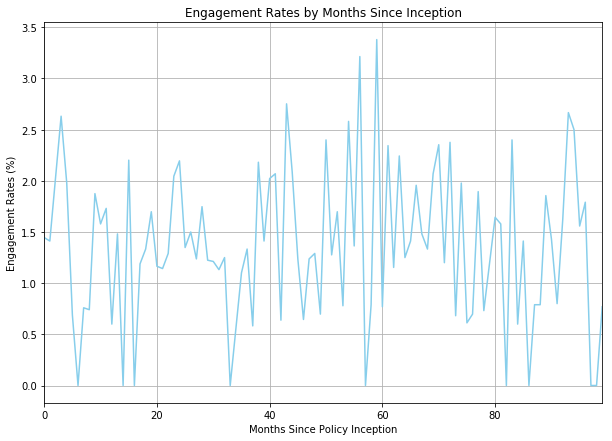

In [36]:
vis=months_inception.fillna(0).plot(figsize=(10,7),title='Engagement Rates by Months Since Inception',grid=True,color='skyblue')
vis.set_xlabel('Months Since Policy Inception')
vis.set_ylabel('Engagement Rates (%)')
plt.show()